<a href="https://colab.research.google.com/github/rajiul123/California-House-Price-Prediction/blob/main/california_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
df = pd.read_csv("housing.csv")
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [92]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [93]:
df.total_bedrooms.mean()

537.8705525375618

In [94]:
df.total_bedrooms.median()

435.0

In [95]:
df.total_bedrooms.mode()

,total_bedrooms
0,280.0


In [96]:
# filling missing values in total_bedrooms column with median values
df["total_bedrooms"] = df["total_bedrooms"].fillna(df.total_bedrooms.median())

In [97]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**Detecting and replacing outliers**

In [98]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

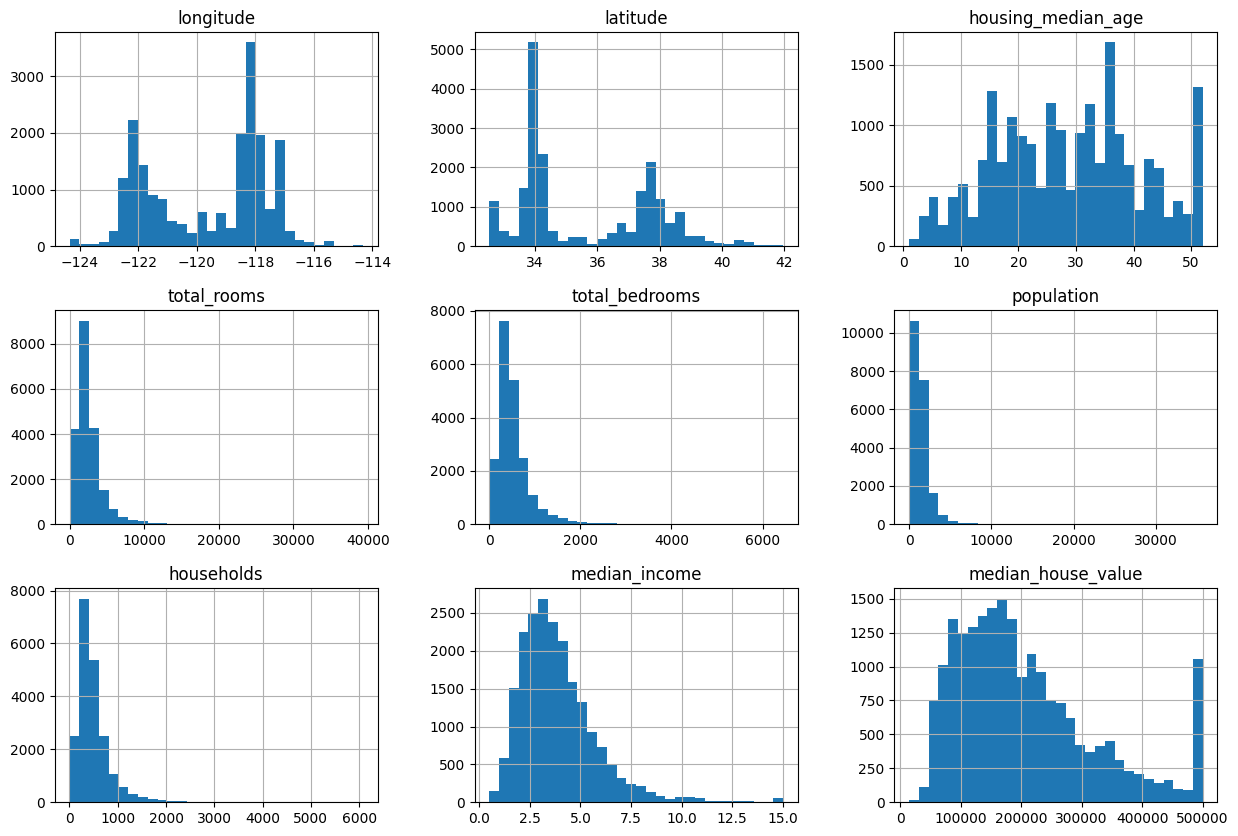

In [99]:
df.hist(bins=30, figsize=(15, 10))

<Axes: ylabel='longitude'>

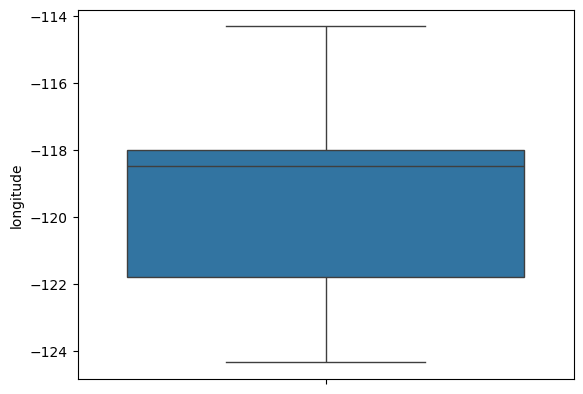

In [100]:
sns.boxplot(df.longitude)

<Axes: ylabel='latitude'>

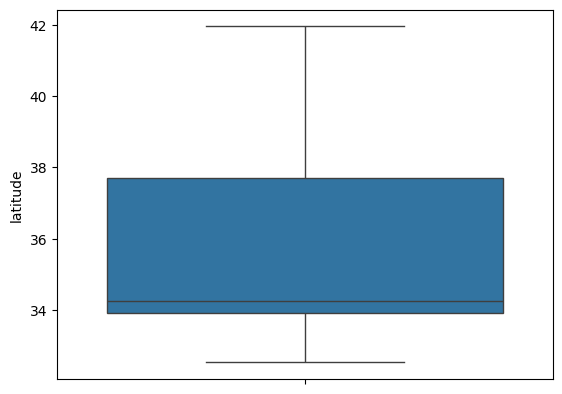

In [101]:
sns.boxplot(df.latitude)

<Axes: ylabel='housing_median_age'>

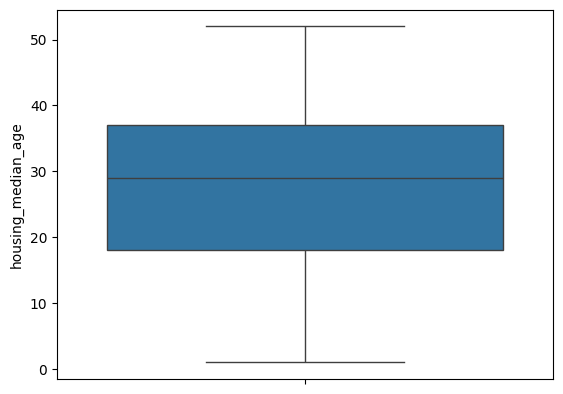

In [102]:
sns.boxplot(df.housing_median_age)

<Axes: ylabel='total_rooms'>

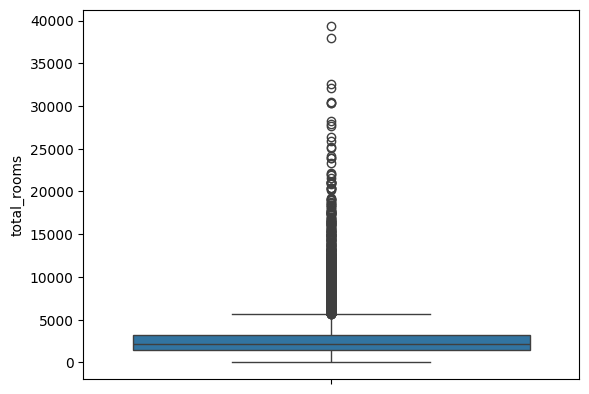

In [103]:
sns.boxplot(df.total_rooms)

<Axes: ylabel='total_bedrooms'>

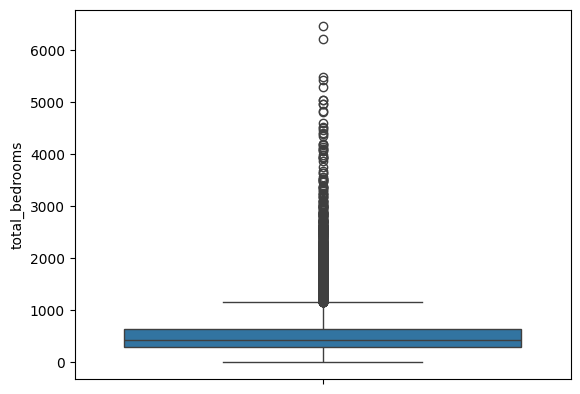

In [104]:
sns.boxplot(df.total_bedrooms)

<Axes: ylabel='population'>

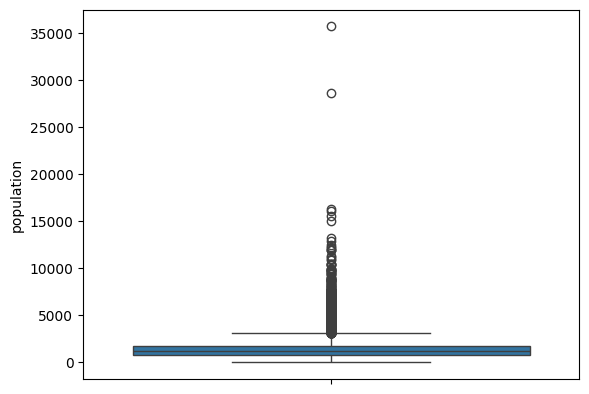

In [105]:
sns.boxplot(df.population)

<Axes: ylabel='households'>

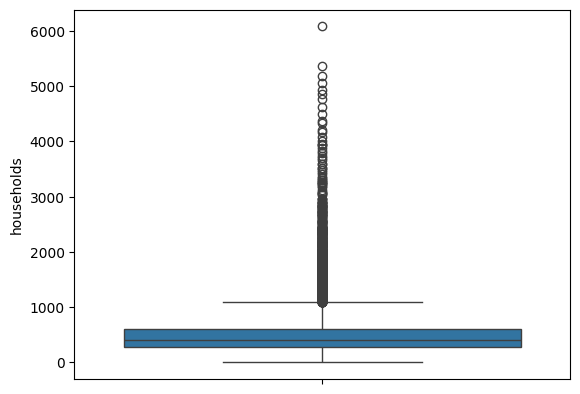

In [106]:
sns.boxplot(df.households)

<Axes: ylabel='median_income'>

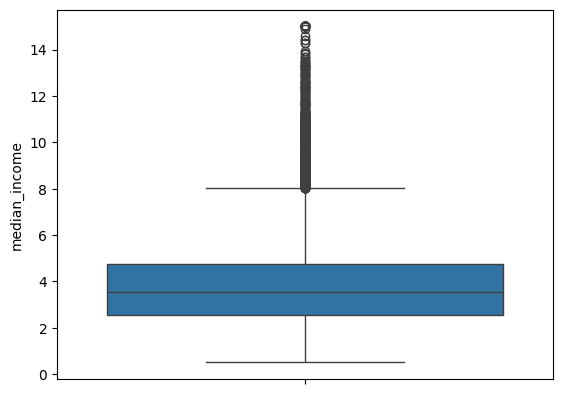

In [107]:
sns.boxplot(df.median_income)

In [108]:
#writing a function to detect outliers
def checking_outliers(df, column):
  outliers = []
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  for i in df[column]:
    if i < lower_bound or i > upper_bound:
      outliers.append(i)
  return len(outliers)

In [109]:
print("Outliers:")
print(f"longitude: {checking_outliers(df, 'longitude')}")
print(f"latitude: {checking_outliers(df, 'latitude')}")
print(f"housing_median_age: {checking_outliers(df, 'housing_median_age')}")
print(f"total_rooms: {checking_outliers(df, 'total_rooms')}")
print(f"total_bedrooms: {checking_outliers(df, 'total_bedrooms')}")
print(f"population: {checking_outliers(df, 'population')}")
print(f"households: {checking_outliers(df, 'households')}")
print(f"median_income: {checking_outliers(df, 'median_income')}")

Outliers:
longitude: 0
latitude: 0
housing_median_age: 0
total_rooms: 1287
total_bedrooms: 1306
population: 1196
households: 1220
median_income: 681


#Observations
* From hist plot and box plot, we are seeing that total_rooms, total_bedrooms, population, households, median_income columns contains outliers.
* From iqr outlier detection method, we know the number of outliers for indivual columns

In [110]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [112]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [113]:
# Handling outliers by capping them
def handling_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)
  for i in df[column]:
    if i > upper_limit:
      df[column] = df[column].replace(i, upper_limit)
    if i < lower_limit:
      df[column] = df[column].replace(i, lower_limit)
  return df

In [114]:
df1 = handling_outliers(df, "total_rooms")

In [115]:
df1.total_rooms.describe()

,total_rooms
count,20640.000000
mean,2441.692472
std,1397.790038
min,2.000000
25%,1447.750000
50%,2127.000000
75%,3148.000000
max,5698.375000


In [123]:
df1 = handling_outliers(df, "total_bedrooms")
df1 = handling_outliers(df, "population")
df1 = handling_outliers(df, "households")
df1 = handling_outliers(df, "median_income")

In [124]:
print("Outliers:")
print(f"longitude: {checking_outliers(df, 'longitude')}")
print(f"latitude: {checking_outliers(df, 'latitude')}")
print(f"housing_median_age: {checking_outliers(df, 'housing_median_age')}")
print(f"total_rooms: {checking_outliers(df, 'total_rooms')}")
print(f"total_bedrooms: {checking_outliers(df, 'total_bedrooms')}")
print(f"population: {checking_outliers(df, 'population')}")
print(f"households: {checking_outliers(df, 'households')}")
print(f"median_income: {checking_outliers(df, 'median_income')}")

Outliers:
longitude: 0
latitude: 0
housing_median_age: 0
total_rooms: 0
total_bedrooms: 0
population: 0
households: 0
median_income: 0


In [125]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2441.692472,501.182086,1336.959012,469.020107,3.801010,206855.816909
std,2.003532,2.135952,12.585558,1397.790038,284.133641,765.550830,265.507540,1.657658,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,5698.375000,1162.625000,3132.000000,1092.500000,8.013025,500001.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [141]:
df_x = df.drop("ocean_proximity", axis=1)

<Axes: >

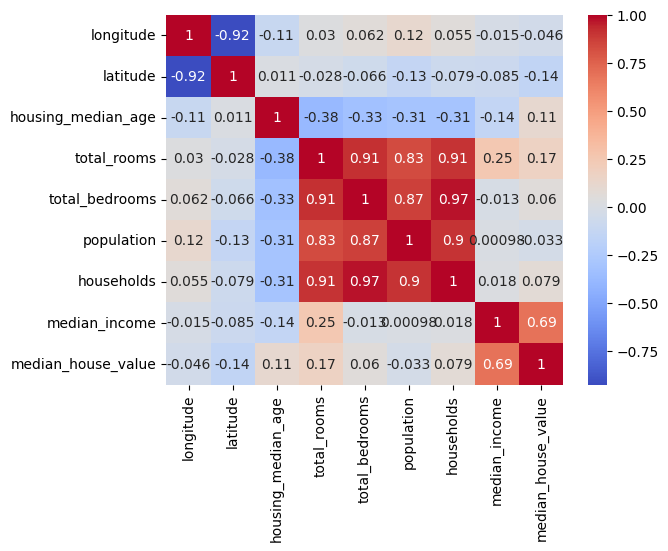

In [142]:
sns.heatmap(df_x.corr(), annot=True, cmap="coolwarm")

**Dealing with categorical data**

In [135]:
location_dummies = pd.get_dummies(df1.ocean_proximity, dtype=int)
location_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [137]:
df1 = pd.concat([df1, location_dummies], axis=1)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,NEAR BAY,0,0,0,1,0,0,0,0,1,0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,NEAR BAY,0,0,0,1,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,NEAR BAY,0,0,0,1,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,NEAR BAY,0,0,0,1,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,NEAR BAY,0,0,0,1,0,0,0,0,1,0


In [138]:
# dropping ocean_proximity
df1.drop("ocean_proximity", axis=1, inplace=True)

In [139]:
df1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.013025,452600.0,0,0,0,1,0,0,0,0,1,0


# Splitting dataset and model training

In [149]:
from sklearn.model_selection import train_test_split
X = df1.drop("median_house_value", axis=1)
y = df1["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 18), (4128, 18), (16512,), (4128,))

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [152]:
lr.score(X_test, y_test)

0.6250934813706363

In [153]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.67583986, 0.66748774, 0.67452449, 0.67103426, 0.65520944])

# Decision Tree Model

In [157]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [158]:
dtr.score(X_test, y_test)

0.6233596067284735

In [167]:
cross_val_score(dtr, X_train, y_train, cv=5)

array([0.63483512, 0.63307204, 0.63303951, 0.64489803, 0.62928992])

# Random Forest

In [159]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [164]:
rfr.score(X_test, y_test)

0.8160871654175024

In [165]:
rfr.score(X_train, y_train)

0.9750656174641809

In [168]:
cross_val_score(rfr, X_train, y_train, cv=5)

array([0.82381236, 0.81260994, 0.81852716, 0.81631075, 0.81100112])

# Support Vector Machine

In [162]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [163]:
svr.score(X_test, y_test)

-0.04820272640913004

In [166]:
svr.score(X_train, y_train)

-0.05386259851724673

In [169]:
cross_val_score(svr, X_train, y_train, cv=5)

array([-0.06342729, -0.05841228, -0.05408663, -0.04017909, -0.05662227])

* It seems random forest model working well. So we'll pick this model